<a href="https://colab.research.google.com/github/dnrb/word2vec_char_level/blob/master/English_tasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set up the repository in Colab**

In [0]:
!git clone https://github.com/dnrb/word2vec_char_level.git

Cloning into 'word2vec_char_level'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 70 (delta 33), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [0]:
cd word2vec_char_level/

/content/word2vec_char_level


**Verify the first data file**

In [0]:
file1 = 'tasa_1.txt'
filehandle1 = open(file1)
lines1 = filehandle1.readlines()
len(lines1)

250000

**Verify the second data file**

In [0]:
file2 = 'tasa_2.txt'
filehandle2 = open(file2)
lines2 = filehandle2.readlines()
len(lines2)

250000

**Verify the third data file**

In [0]:
file3 = 'tasa_3.txt'
filehandle3 = open(file1)
lines3 = filehandle3.readlines()
len(lines3)

250000

**Construct the full tasa corpus**

In [0]:
corpus = lines1 + lines2 + lines3
len(corpus)

750000



**Gather every words in the corpus**

In [0]:
import string
words = []

for sentence in corpus:
    
    for word in sentence.split(' '):
        
        if word not in string.punctuation:
            words.append(word)
            


In [0]:
len(words)

11556159

In [0]:
words[:10]

['who',
 'were',
 'the',
 'first',
 'americans',
 '?\n',
 'many',
 'many',
 'years',
 'ago']

In [0]:
word_set = set(words)

**Convert text to int to prepare word2vec**

In [0]:
def str_to_int(lst):
    counter = 0
    new_list = []
    existed = {}
    
    for string in lst:
        if string not in existed:
            existed[string] = counter
            new_list.append(existed[string])
            counter += 1
        else:
            new_list.append(existed[string])
            
    return new_list

In [0]:
word2int = str_to_int(words)

In [0]:
min(word2int)

0

In [0]:
max(word2int)

95209

**Set up the constants**

In [0]:
n_Train = 50
n_Voc = max(word2int) + 1
n_Corpus = len(word2int)
WINDOW_SIZE = 2

In [0]:
n_Voc

95210

**Initialize two arrays**

In [0]:
import numpy as np

def data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int):

    X = np.zeros((n_Train, n_Voc))
    Y = np.zeros((n_Train, n_Voc))

    for i in range(n_Train):
        j = np.random.choice(n_Corpus, 1)[0]

        tw = word2int[j]

        Y[i][tw] = 1

        for k in range(j - WINDOW_SIZE, j + WINDOW_SIZE + 1):
            if k != j and k >= 0 and k < n_Corpus:
                cw = word2int[k]
                X[i][cw] = 1
                
    return X, Y

In [0]:
data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

**Deploy TensorFlow trainning**

In [0]:
import tensorflow as tf

ONE_HOT_DIM = n_Voc

# # function to convert numbers to one hot vectors
# def to_one_hot_encoding(data_point_index):
#     one_hot_encoding = np.zeros(ONE_HOT_DIM)
#     one_hot_encoding[data_point_index] = 1
#     return one_hot_encoding

# X = [] # input word
# Y = [] # target word

# for x, y in zip(df['input'], df['label']):
#     X.append(to_one_hot_encoding(word2int[ x ]))
#     Y.append(to_one_hot_encoding(word2int[ y ]))

# # convert them to numpy arrays
# X_train = np.asarray(X)
# Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float64, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float64, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 30

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM], dtype=tf.float64))
b1 = tf.Variable(tf.random_normal([1], dtype=tf.float64)) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM], dtype=tf.float64))
b2 = tf.Variable(tf.random_normal([1], dtype=tf.float64))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation(learning rate)
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


**Train**

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration + 1):
    X, Y = data_generate(n_Train, n_Voc, n_Corpus, WINDOW_SIZE, word2int)
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X, y_label: Y})
    if i % 500 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X, y_label: Y}))

iteration 0 loss is :  45.27723905893506
iteration 500 loss is :  36.74377781916859
iteration 1000 loss is :  35.68112012298206
iteration 1500 loss is :  31.51725788649353
iteration 2000 loss is :  30.12225148223883
iteration 2500 loss is :  29.896862004495347
iteration 3000 loss is :  29.76045943154886
iteration 3500 loss is :  26.0091892616038
iteration 4000 loss is :  22.933854342252506
iteration 4500 loss is :  26.313427802687666
iteration 5000 loss is :  26.315180610402457
iteration 5500 loss is :  26.55770612229167
iteration 6000 loss is :  21.35280444603096
iteration 6500 loss is :  21.45428878232258
iteration 7000 loss is :  25.165979275244684
iteration 7500 loss is :  20.597821563332555
iteration 8000 loss is :  21.12195986898236
iteration 8500 loss is :  22.008606483085973
iteration 9000 loss is :  20.363059341506506
iteration 9500 loss is :  19.694953068274778
iteration 10000 loss is :  19.685779685131006
iteration 10500 loss is :  17.82799070745083
iteration 11000 loss is :

**Visualization**

In [0]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE

Z = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
Z_embedded = TSNE(n_components=2).fit_transform(Z)
Z_embedded.shape

(4, 2)

In [0]:
vectors = sess.run(W1 + b1)
vectors

array([[-1.19915131, -1.11491343, -1.02262569, ..., -1.07692665,
        -1.05495719, -1.1436516 ],
       [-0.94862436, -0.93085725, -1.10070969, ..., -1.1107935 ,
        -1.14147339, -1.14030519],
       [-0.8579757 , -1.00350277, -1.03887102, ..., -1.04388361,
        -1.00518757, -1.02341673],
       ...,
       [-1.99020407, -1.26899034, -0.98317204, ..., -1.05859043,
        -2.8925425 , -1.01175159],
       [-1.19641902, -1.88050549, -1.87903185, ..., -0.62608696,
        -1.14207097, -1.08817045],
       [-3.55513306, -0.34739111, -0.22456296, ..., -2.44876306,
        -2.60572656, -3.11007246]])

In [0]:
vector_embedded_2d = TSNE(perplexity=100).fit_transform(vectors)
vector_embedded_2d.shape

(95210, 2)

In [0]:
len(words)

11556159

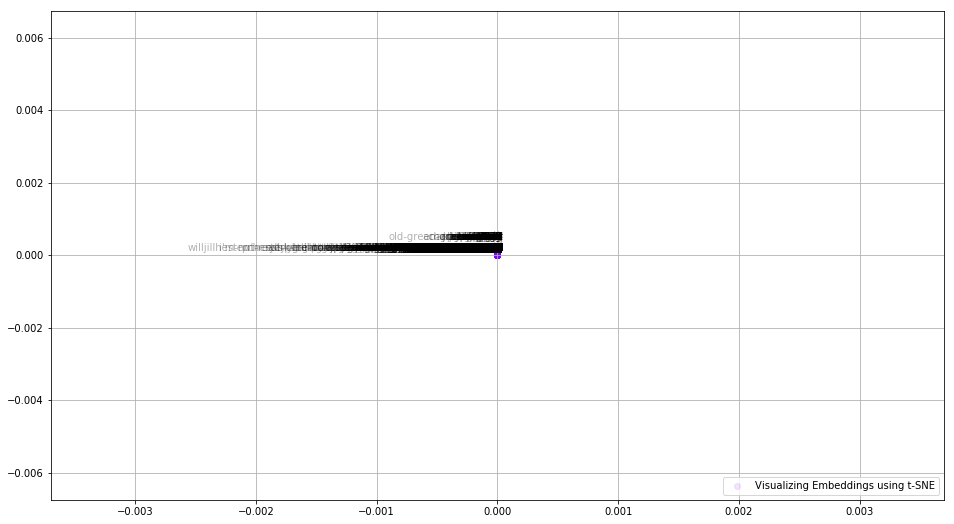

In [0]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Visualizing Embeddings using t-SNE', vector_embedded_2d, word_set, a=0.1)

In [0]:
vector_embedded_3d = TSNE(n_components=3).fit_transform(vectors)
vector_embedded_3d.shape

(95210, 3)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


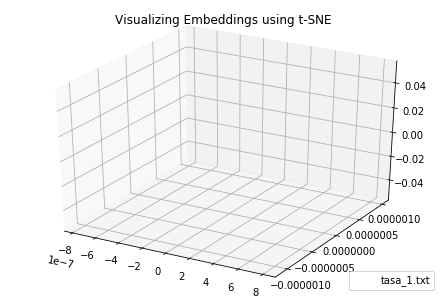

In [0]:
def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'tasa_1.txt', vector_embedded_3d, a=0.1)

**Remove stop words**

In [0]:
# import nltk
# nltk.download('stopwords')

In [0]:
# stopwords = nltk.corpus.stopwords.words('english')
# cleaned_words = []

# for word in words:
#     if word not in stopwords:
#         cleaned_words.append(word)